# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [41]:
# import the relevent tools of the trade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
%matplotlib inline
import math
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
import pylab 

# import the data
df = pd.read_csv('data/human_body_temperature.csv')

In [14]:
# taking a look at the structure of the data
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1) Is the distribution of body temperatures normal?

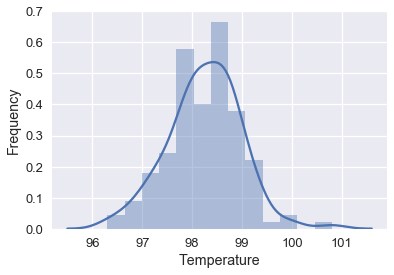

In [31]:
sns.distplot(df['temperature'])
plt.ylabel('Frequency')
plt.xlabel('Temperature');

At a glance the distribution looks overall normal, but lets take a closer look...

In [ ]:
We can do this several ways but here is the datacamp method:

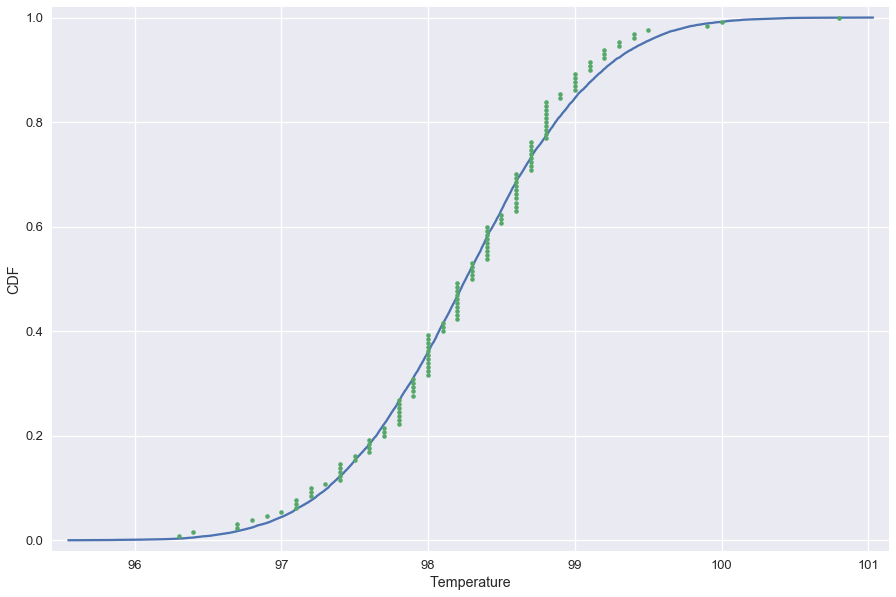

In [116]:
def ecdf(data):
    """one-dimensional"""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1.0,n+1) / n
    
    return x, y


mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])


# Create a normal sample distribution
sample = np.random.normal(mu, sigma, 10000)

# Generate a CDF
x, y = ecdf(df['temperature'])
x_t, y_t = ecdf(sample)

# Plot it out
fig, ax = plt.subplots(figsize=(15, 10))
_ = plt.plot(x_t, y_t)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')
plt.show()

Or the east way:

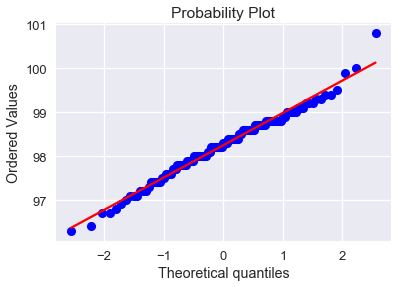

In [25]:
stats.probplot(df['temperature'], dist="norm", plot=pylab);


Once again looks mostly normal with some righteard schewing toward the end, but within the acceptable limits for our purposes. It also appears that there may be one or two outliers in the group.

If we want something a little more quantitative:

In [26]:
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

as the value is greater than 0.05 it seems we have a decent probability that the distribution is in fact normal. As we have somewhat contradictory tests it is fortunatly that CLT does not require that a sample be perfectly normal e.g. reality.

# 2) Is the sample size large? Are the observations independent?

In [28]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


There are 130 measurements (people). Since we requrie only 30 via *t* and *z* distributions we are clear there.

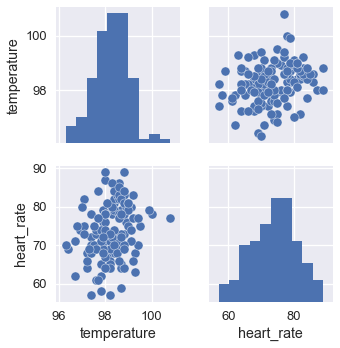

In [33]:
sns.pairplot(df);

There seems to no other immediatly discernable relationshios in the data, and assuming that there samples were taken randomly from a representative patient population, i.e. not all from a demographical subset, then the data should appears to meet CLT requirments for independent and random measurement of samples.

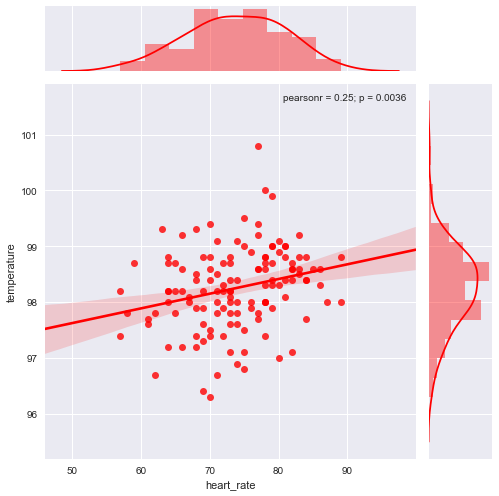

In [10]:
s = sns.jointplot("heart_rate", "temperature", data=df, kind="reg", color="r", size=7)

It is worth taking a closer look at heart rate and temp, just to be sure. There is a clinical (physiological) relationship between these two variables. However, it should not be anything that would interfear with the analysis. **Of note**: one factor that can have an impact of measurement of temperature that is not addressed here is age.

# 3) Is the true population mean really 98.6 degrees F?

NO!

**Would you use a one-sample or two-sample test? Why?**

I would use a one sample test as we only have one sample from the population.

**In this situation, is it appropriate to use the  t  or  z  statistic?**

Either can technically be used as we have a sample size > 30. Hwowever, as we are well over 30 it is preferred to use the z-test.

**Now try using the other test. How is the result be different? Why?**

We still reject the null hypothesis. 

In [40]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

For the test model we will assume a null hypothesis of 98.6 being the population mean and an alternate that is is NOT.

h0: μ == 98.6

h1: μ != 98.6

In [44]:
# useing the z-test to calaculate the result and confirming the result with a t-test

print('z-test : ', ztest(df['temperature'], value=98.6))
print('t-test : ', stats.ttest_1samp(df['temperature'], 98.6))

z-test :  (-5.4548232923645195, 4.9021570141012155e-08)
t-test :  Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


as the z and t tests have p-values that are exceptionaly small (relative to 0.05), we can safely reject the null hypothesis with 95% condidence according to both tests.

# 4) Draw a small sample of size 10 from the data and repeat both tests

In [122]:
# Reampling with replacement i.e. bootsrapping

sample10 = np.random.choice(df['temperature'], size=10)

In [126]:
print('Mean: ', np.mean(sample10))
print('Median: ', np.median(sample10))
print('Stdev: ', np.std(sample10))

Mean:  98.02
Median:  98.3
Stdev:  0.830421579681


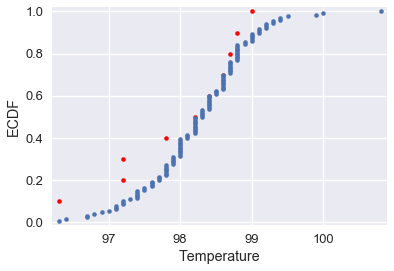

In [129]:
# Compute and plot ECDF from bootstrap sample
x, y = ecdf(sample10)
_ = plt.plot(x, y, marker='.', linestyle='none', color='red', alpha=1)

# Compute and plot ECDF from original data
x, y = ecdf(df['temperature'])
_ = plt.plot(x, y, '.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [137]:
# comparing our CI for the sub-sample against that of the overall sample
sample_CI = np.percentile(sample10, [2.5, 97.5])
print(sample_CI)

[ 96.5025  98.955 ]


In [130]:
# useing the z-test to calaculate the result and confirming the result with a t-test
print('z-test : ', ztest(sample10, value=98.6))
print('t-test : ', stats.ttest_1samp(sample10, 98.6))

z-test :  (-2.0953212712369753, 0.036142442810867606)
t-test :  Ttest_1sampResult(statistic=-2.0953212712369753, pvalue=0.065614519129297791)


Given that we are useing a smaller sample size here e.g. 10 instead of 130 we it would be correct to apply the t-test. In this situation the t-test does not allow us to reject the null hypothesis, but the z-test does based on a p-value of 0.05. Thus it would seem if you choose to use a z-test on a sample that to too small you will get a potentially inaccurate result.

# 5) At what temperature should we consider someone's temperature to be "abnormal"?

An abnormal temperature in this case (for an average healthy person) would be any value that is outside of the 95% confidence interval. There are many factors that would requrie adjustment of this apprach in a realistic setting.

In [134]:
observations = len(df['temperature'])
mean = df['temperature'].mean()
sdev = df['temperature'].std()

sigma = sdev/np.sqrt(observations)
interval = 1.96*sigma

low, high = [round(mean-interval, 3), round(mean+interval, 3)]

print('Any temperature below', low, 'or above', high, 'is considered abnormal')

Any temperature below 98.123 or above 98.375 is considered abnormal


# 6) Is there a significant difference between males and females in normal temperature?

In [120]:
men = df[(df['gender'] == 'M')]
women = df[(df['gender'] == 'F')]

print(len(men) ,"men")
print(len(women) ,"women")

65 men
65 women


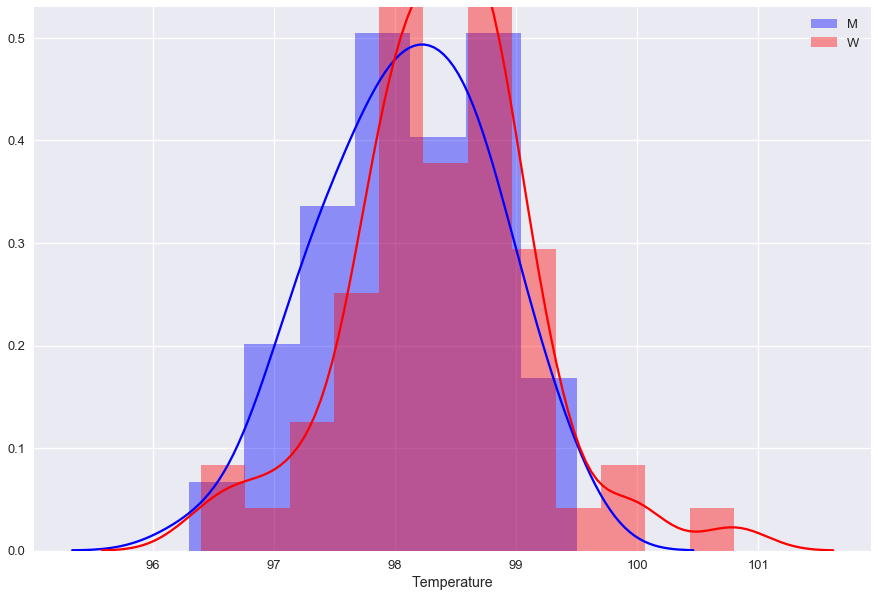

In [100]:

# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(15, 10))

# Plot a simple histogram with binsize determined automatically
sns.distplot(men['temperature'], color="b", label='M')

# Plot a kernel density estimate and rug plot
sns.distplot(women['temperature'], color="r", label='W')
plt.xlabel('Temperature')
plt.legend();

From the above plot it would appear that there is a difference in the two populations. But is it statistically (or practically) significant?

In [103]:
print('Average temp for men: ', men['temperature'].mean())
print('Average temp for women: ', women['temperature'].mean())
print('Difference: ',  (women['temperature'].mean() - men['temperature'].mean()))

Average temp for men:  98.1046153846154
Average temp for women:  98.39384615384613
Difference:  0.289230769230727


Making the null that there is no difference and the alternate that there is a difference:

In [104]:
stats.ttest_ind(men['temperature'], women['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

p is < 0.05 and thus we can assume that there is a difference in the two populations.

Thus, we do have a **statistically** significant difference in temperature with women having a slightly higher. However, a difference of 0.3 or so degrees F has little significant impact as far as base line temperature is concerned.